In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
import re
import string
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [2]:
# Function to preprocess text
# data cleaning
def word_prob(word): return dictionary[word] / total
def words(text): return re.findall('[a-z]+', text.lower())
dictionary = Counter(words(open(r'\Dataset\merged.txt').read()))
max_word_length = max(map(len, dictionary))
total = float(sum(dictionary.values()))

def viterbi_segment(text):
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
                        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]

def fix_hashtag(text):
    text = text.group().split(":")[0]
    text = text[1:] # remove '#'
    try:
        test = int(text[0])
        text = text[1:]
    except:
        pass
    output = ' '.join(viterbi_segment(text)[0])
    return output

def preprocess_text(text):
    """pattern = re.compile(r"(.)\1{2,}")
    text = pattern.sub(r"\1\1", str(text))
    text = re.sub(r'http.?://[^\s]+[\s]?', '', str(text))
    punct = string.punctuation
    trantab = str.maketrans(punct, len(punct) * ' ')  # Every punctuation symbol will be replaced by a space
    text = text.translate(trantab)
    text = text.lower()
    text = text.strip()"""
    text = re.sub(r'([^\s\w]|\d|_)+', '', text)
    text = text.lower()
    text = re.sub("(#[A-Za-z0-9]+)", fix_hashtag, text)
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    
    text = re.sub('\d+', '', str(text))
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)     
        
    ps = PorterStemmer()
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    text = " ".join(lemma_words)
    
    nltk.download('stopwords')
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = text.split()
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
    text = " ".join(clean_words)
    
    text = text.strip()
    return text

In [3]:
# Load training data from Excel files
happiness_data = pd.read_csv(r"\Dataset\angriness.csv")
angriness_data = pd.read_csv(r"\Dataset\happiness.csv")
sadness_data = pd.read_csv(r"\Dataset\sadness.csv")

# Combine all data and create labels
all_data = pd.concat([happiness_data, angriness_data, sadness_data], ignore_index=True)
all_data["processed_text"] = all_data["content"].apply(preprocess_text)

print(all_data.info())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         2039 non-null   object
 1   intensity       2039 non-null   object
 2   processed_text  2039 non-null   object
dtypes: object(3)
memory usage: 47.9+ KB
None


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
emotion_label_map = {
    'sadness': 2,
    'happiness': 1,
    'angriness': 3
}

# Define a function to map the values
def set_emotionvalue(row_number, assigned_value):
    return assigned_value[row_number]

df_copy = all_data[['processed_text']].copy()
df_copy['emotion_label'] = all_data['intensity'].apply(set_emotionvalue, args=(emotion_label_map, ))

#print(df_copy[:10])
# saving the dataframe
df_copy.to_csv(r'\Dataset\cleaned_data.csv')


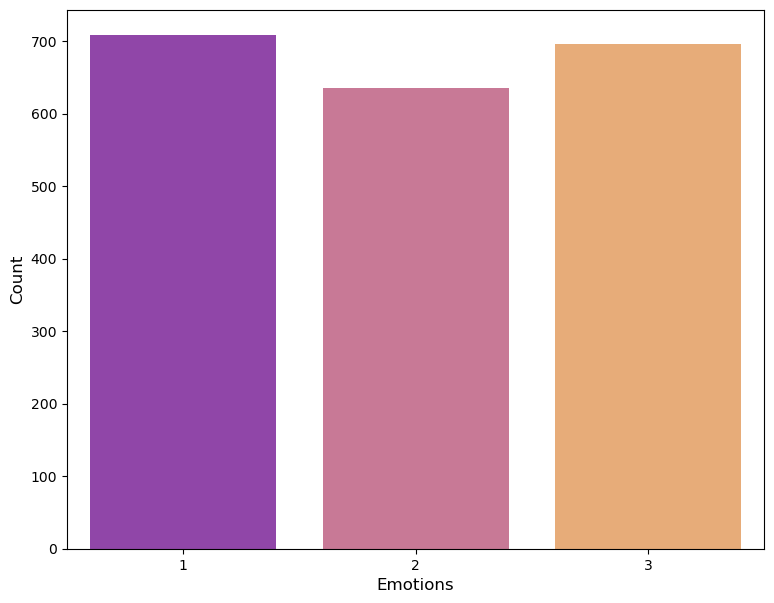

In [5]:
count  = df_copy.iloc[:,1].value_counts()
plt.figure(figsize=(9,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="plasma")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

In [26]:
X_train = df_copy.iloc[:,0][:1979]
y_train = df_copy.iloc[:,-1][:1979]
X_val = df_copy.iloc[:,0][1001:]
y_val = df_copy.iloc[:,-1][1001:]


In [27]:
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train.astype('U'))
X_val_tfidf = tfidf.fit_transform(X_val.astype('U'))
print(tfidf.vocabulary_)

{'unhappiness': 930, 'lose': 461, 'get': 282, 'want': 940, 'happy': 303, 'happiness': 301, 'no': 537, 'happiness no': 302, 'painful': 577, 'experience': 214, 'let': 416, 'go': 290, 'let go': 419, 'value': 934, 'others': 569, 'without': 970, 'pain': 571, 'not': 543, 'know': 404, 'pain not': 572, 'not know': 547, 'thought': 857, 'love': 473, 'life': 421, 'body': 56, 'need': 524, 'make': 482, 'make happy': 485, 'away': 35, 'either': 169, 'habit': 296, 'many': 489, 'people': 580, 'miss': 510, 'stop': 797, 'soul': 754, 'every': 183, 'one': 566, 'else': 170, 'future': 281, 'yet': 986, 'best': 52, 'actually': 2, 'control': 80, 'world': 974, 'accept': 1, 'stay': 781, 'true': 911, 'long': 456, 'last': 410, 'day': 97, 'first': 259, 'learn': 412, 'wait': 935, 'like': 425, 'moment': 513, 'back': 37, 'begin': 47, 'start': 768, 'forget': 274, 'happen': 297, 'focus': 268, 'well': 956, 'person': 585, 'piece': 592, 'live': 452, 'everything': 189, 'around': 34, 'rest': 651, 'mean': 495, 'perfect': 584, 

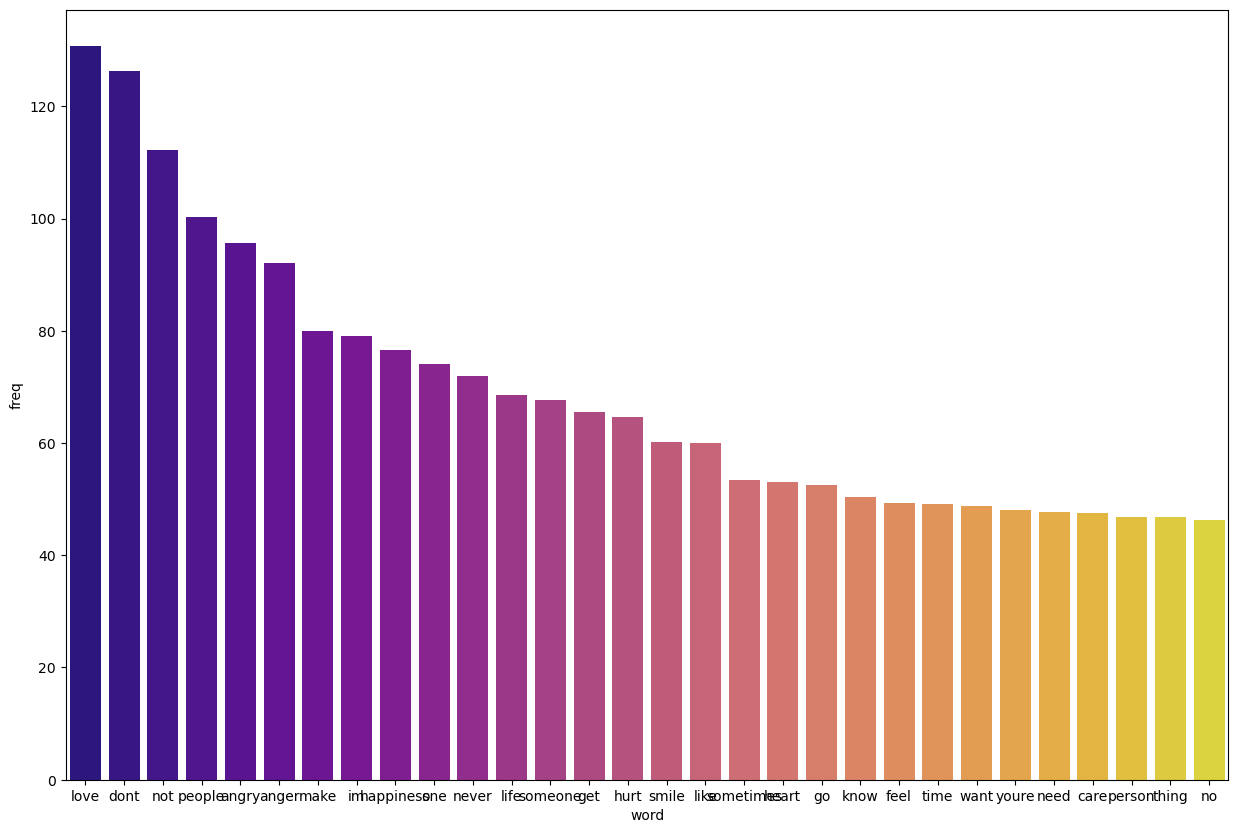

In [28]:
bow = tfidf.fit_transform(df_copy.iloc[:,0].astype('U'))
word_freq = dict(zip(tfidf.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(30), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="word", y="freq", data= word_counter_df, ax=ax, palette="plasma")
plt.show();

In [29]:
# Extracting Count Vectors Parameters
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(df_copy.iloc[:,0].astype('U'))
X_train_count =  count_vect.transform(X_train.astype('U'))
X_val_count =  count_vect.transform(X_val.astype('U'))
print(count_vect.vocabulary_)

{'sometimes': 1630, 'im': 907, 'not': 1207, 'angry': 63, 'hurt': 892, 'big': 178, 'difference': 484, 'available': 116, 'busy': 244, 'people': 1286, 'exist': 623, 'impress': 919, 'world': 1954, 'live': 1042, 'life': 1029, 'way': 1903, 'make': 1082, 'happy': 822, 'everything': 606, 'get': 767, 'expensive': 629, 'except': 617, 'cheaper': 293, 'phone': 1300, 'screen': 1524, 'brighter': 224, 'future': 754, 'anger': 60, 'feel': 676, 'mouth': 1159, 'work': 1953, 'faster': 665, 'mind': 1129, 'man': 1083, 'good': 781, 'keep': 980, 'idiot': 902, 'second': 1531, 'read': 1420, 'without': 1945, 'best': 172, 'someone': 1628, 'attention': 111, 'stop': 1675, 'give': 771, 'like': 1034, 'bring': 226, 'past': 1271, 'present': 1359, 'look': 1053, 'well': 1911, 'wakeupjobnoluvdaarusleeprepeat': 1890, 'hater': 832, 'thanks': 1760, 'famous': 660, 'dont': 510, 'sht': 1578, 'talk': 1733, 'behind': 167, 'back': 130, 'bad': 134, 'person': 1296, 'special': 1645, 'yesterday': 1975, 'unwanted': 1864, 'today': 1791,

(2039, 1993)


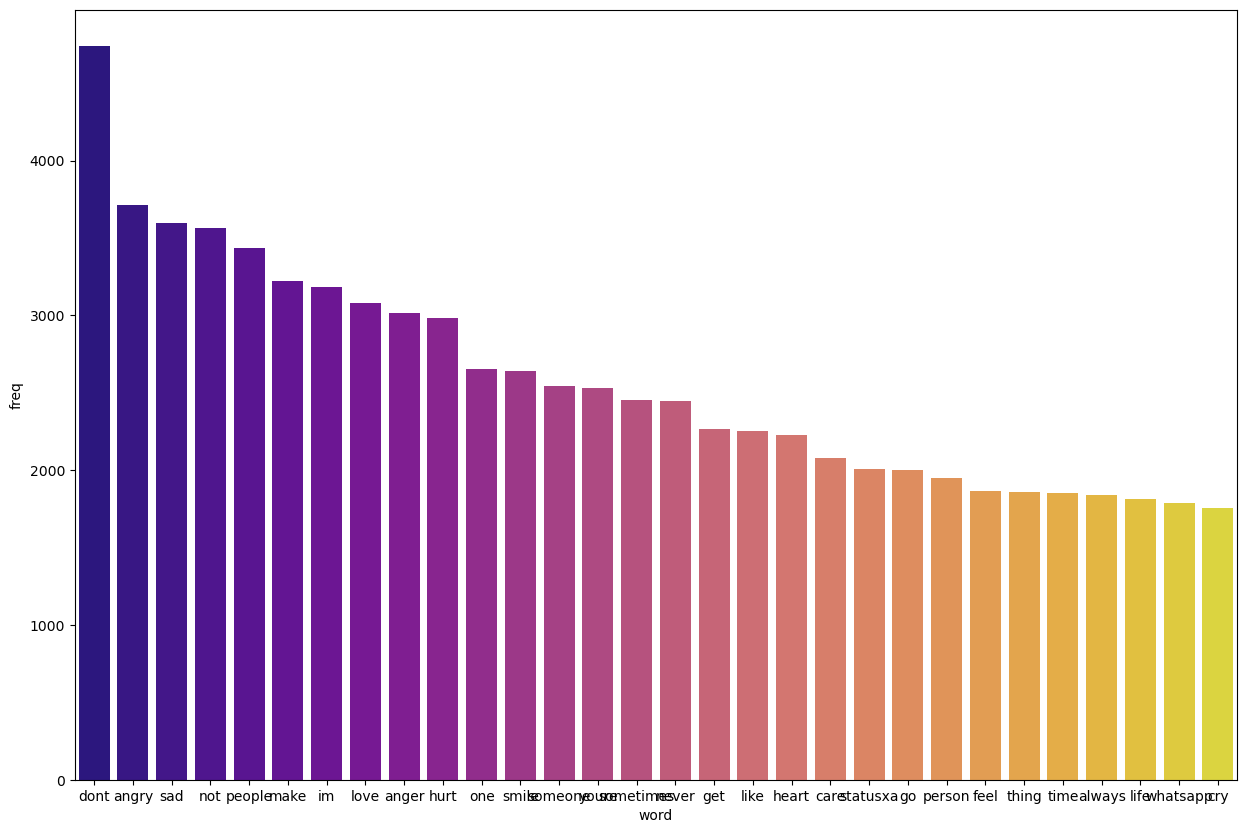

In [30]:
bow = count_vect.fit_transform(df_copy.iloc[:,0].astype('U'))
print(bow.shape)
word_freq = dict(zip(count_vect.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(30), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="word", y="freq", data= word_counter_df, ax=ax, palette="plasma")
plt.show();

In [31]:
#Model 1: Multinomial Naive Bayes Classifier

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred, y_val))
# naive bayes tfidf accuracy 0.24907063197026022

naive bayes tfidf accuracy 0.5404624277456648


In [32]:
#Model 2: Linear SVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_val_tfidf)
print('svm using tfidf accuracy %s' % accuracy_score(y_pred, y_val))
# svm using tfidf accuracy 0.0018587360594795538

svm using tfidf accuracy 0.49710982658959535


In [33]:
#Model 3: logistic regression
logreg = LogisticRegression(C=1, max_iter=100)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_val_tfidf)
print('log reg tfidf accuracy %s' % accuracy_score(y_pred, y_val))
# log reg tfidf accuracy 0.0

log reg tfidf accuracy 0.49710982658959535


In [34]:
# Model 1: Multinomial Naive Bayes Classifier

nb1 = MultinomialNB()
nb1.fit(X_train_count, y_train)
y_pred = nb1.predict(X_val_count)
print('naive bayes count vectors accuracy %s' % accuracy_score(y_pred, y_val))
# naive bayes count vectors accuracy 0.8736059479553904

naive bayes count vectors accuracy 0.7013487475915221


In [35]:
# Model 2: Logistic Regression
logreg1 = LogisticRegression(C=1, max_iter=500)
logreg1.fit(X_train_count, y_train)
y_pred = logreg1.predict(X_val_count)
print('log reg count vectors accuracy %s' % accuracy_score(y_pred, y_val))
# log reg count vectors accuracy 0.9237918215613383

log reg count vectors accuracy 0.9248554913294798


In [36]:
# Model 3: Linear SVM
lsvm1 = SGDClassifier(alpha=0.001, random_state=5, max_iter=2, tol=None)
lsvm1.fit(X_train_count, y_train)
y_pred = lsvm1.predict(X_val_count)
print('lsvm using count vectors accuracy %s' % accuracy_score(y_pred, y_val))
# lsvm using count vectors accuracy 0.8866171003717472

lsvm using count vectors accuracy 0.8439306358381503


In [50]:
input_text = pd.DataFrame(["I am so angry at you!!!!!", 
        "you ve hit a new low with a danger of blm fascist slogan please stop it before too late stop", 
        "I love my doggg", 
        "I think i'm gonna be sick :'‑(", 
        "I hate you so much",
        "I'm at work", 
        "@TheTombert i was watching Harpers Island, lol... there was no vodka involved", 
        "sometimes i wish things could go back to the way they were the beginning of last summer", 
        "it's your 18th birthday finally!!! yippeeeee", 
        "still waiting in line", 
        "aarrgghh - fu*k.....a hose has leaked water all over the new floating floor", 
        "that b*tch is so ugly", 
        "oh no he is hospitalised!!!", 
       ])
text_count = count_vect.transform(input_text[0])

In [51]:
#Predicting the emotion of the text 
text_pred = logreg1.predict(text_count)
print(text_pred)
input_text[0]

[3 3 1 1 1 1 1 2 1 1 1 1 3]


0                             I am so angry at you!!!!!
1     you ve hit a new low with a danger of blm fasc...
2                                       I love my doggg
3                        I think i'm gonna be sick :'‑(
4                                    I hate you so much
5                                           I'm at work
6     @TheTombert i was watching Harpers Island, lol...
7     sometimes i wish things could go back to the w...
8          it's your 18th birthday finally!!! yippeeeee
9                                 still waiting in line
10    aarrgghh - fu*k.....a hose has leaked water al...
11                                that b*tch is so ugly
12                          oh no he is hospitalised!!!
Name: 0, dtype: object

In [52]:
final_result=input_text.copy()

In [53]:
final_result['result']=text_pred
final_result=final_result.rename(columns={0:"input_text"})
final_result=final_result.rename(columns={"result":"predicted_emotion"})
final_result=final_result.replace({1: 'Happy', 2: 'Sad', 3: 'Anger'})
final_result


,input_text,predicted_emotion
0,I am so angry at you!!!!!,Anger
1,you ve hit a new low with a danger of blm fasc...,Anger
2,I love my doggg,Happy
3,I think i'm gonna be sick :'‑(,Happy
4,I hate you so much,Happy
5,I'm at work,Happy
6,"@TheTombert i was watching Harpers Island, lol...",Happy
7,sometimes i wish things could go back to the w...,Sad
8,it's your 18th birthday finally!!! yippeeeee,Happy
9,still waiting in line,Happy


In [54]:
final_result.to_csv(r'\Dataset\output_result.csv')